### Step 0 : Import Libraries and Dependencies**

In [63]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

### Step 1:  Read csv file and create a DataFrame

In [56]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [57]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [58]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [62]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Step 2: Prepare the Data 
**Scale the DataFrame and create a new DataFrame that contains the scaled data**

In [6]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

In [8]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled, columns= ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [9]:
df_market_data_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


After standardizing data the mean values are closer to zero and standard deviation for each feature is approximately 1.012423 which confirms that scaled data is centered around 0 with unit variance.

---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k= list(range(1,11))

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i,random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k,'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_original_scaled = elbow_df.hvplot.line(x='k',
                     y='inertia',
                     title='Elbow Curve - Original Scaled Data',
                     xticks='k')
elbow_original_scaled

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The resulting elbow graph shows two sharp points, out of which 4 seems to be the optimal K value with lower inertia of 79.022.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [14]:
# Initialise the K-Means model using the best value for k
k_model = KMeans(n_clusters=4,random_state=1)

In [15]:
# Fit the K-Means model using the scaled DataFrame
k_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k_model_clusters = k_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(k_model_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [17]:
# Create a copy of the scaled DataFrame
k_model_prediction = df_market_data_scaled.copy()

In [18]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
k_model_prediction['k_clusters_4'] = k_model_clusters

# Display the copy of the scaled DataFrame
k_model_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_clusters_4
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [19]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

sctter_original_scaled = k_model_prediction.hvplot.scatter(
x='price_change_percentage_24h',
y='price_change_percentage_7d',
by='k_clusters_4',
title="Cryptocurrency Clusters- Original Scaled Data :K=4 ",
hover_cols='coin_id'
)
sctter_original_scaled

:NdOverlay   [k_clusters_4]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

This scatter plot presents a clearer distribution of cryptocurrencies based on their price change behaviors, showing four distinct clusters.

The Yellow cluster represents cryptocurrencies that are consistently increasing over both timeframes, short term (24 hrs) and long term (7 days) indicating steady growth.

The Blue cluster contains cryptocurrencies that are either stable or experiencing slight decline, especially over 24 hours. 

The Green cluster shows highly volatile behavior with a dramatic decline in 24 hours but recovery over 7 days, indicating sudden market shocks.

The Red cluster consists of a very small number of points, with modest +ve change over 24 hours and slightly +ve over 7 day period.

This scatter plot reflects a slight positive correlation between 24 hours and 7 days price change, specially for orange cluster.

---

### Optimise Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [22]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [23]:
sum(pca.explained_variance_ratio_)*100

89.5031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The first, second and third principal components explain 37.2% , 34.7 and 17.6% of the variance respectively. The relatively even distribution across the first two components indicates that both are almost equally important in explaining the variability in the data. 

This PCA model with 3 principal components has captured 89.50% of variability in the original features, which means these three components effectively capture the most significant patterns in the dataset, providing a well-balanced approach to dimensionality reduction and information retention.

In [24]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_data_pca,columns=["PCA1",'PCA2','PCA3'])

# Copy the crypto names from the original scaled DataFrame
df_market_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_pca = df_market_pca.set_index('coin_id')

# Display the scaled PCA DataFrame
df_market_pca.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [25]:
# Create a list with the number of k-values from 1 to 11
k_pca=list(range(1,11))

In [26]:
# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model = KMeans(n_clusters=i,random_state=0)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k_pca, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


In [28]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_pca_scaled = df_elbow_pca.hvplot.line(x='k',
                    y='inertia',
                    title='Elbow Curve- PCA Data')
elbow_pca_scaled

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The sharp elbow appears at K=4 where the drop in inertia starts to slightly flatten out. So the optimal k value is 4 using PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Optimal K value ,determined from both the data sources ,original data and PCA scaled data,consistently reflects K=4. However, k=2 also looks like a candidate with sharp elbow.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [29]:
# Initialise the K-Means model using the best value for k
pca_model = KMeans(n_clusters=4,random_state=1)

In [30]:
# Fit the K-Means model using the scaled PCA DataFrame
pca_model.fit(df_market_pca)

KMeans(n_clusters=4, random_state=1)

In [31]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = pca_model.predict(df_market_pca)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [32]:
# Create a copy of the scaled PCA DataFrame
market_pca_prediction = df_market_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
market_pca_prediction['pca_clusters_4'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
market_pca_prediction.head()

,PCA1,PCA2,PCA3,pca_clusters_4
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [33]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_pca_scaled = market_pca_prediction.hvplot.scatter(x='PCA1',
                            y='PCA2',
                            by='pca_clusters_4',
                            hover_cols='coin_id',
                                    title="CryptoCurrency Segment- Scaled PCA data: PCA=3,K=4")
scatter_pca_scaled

:NdOverlay   [pca_clusters_4]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

The PCA-based clustering effectively grouped cryptocurrencies into four distinct clusters, each exhibiting clear behavioral patterns such as stability, growth, and volatility. While k-means clustering without optimization also identified meaningful clusters, it was less effective at capturing distinct differences, particularly in high-dimensional data. Notably, the green and red clusters contained only a single data point, prompting further analysis using alternative clustering models and performance comparisons to achieve a more accurate and optimal k value

### Getting the Cryptocurrency from original data for each cluster based on PCA

In [64]:
#Inspect the DataFrame with assigned clusters
PCA_cryptocurrencies_df = market_pca_prediction.reset_index()

#Retrieve cryptocurrencies coin_id by cluster
for cluster_label in PCA_cryptocurrencies_df['pca_clusters_4'].unique():
    coin_ids_in_cluster = PCA_cryptocurrencies_df[PCA_cryptocurrencies_df['pca_clusters_4'] == cluster_label]['coin_id']
    print(f"Cluster {cluster_label} Cryptocurrencies: {coin_ids_in_cluster.values}")
    print("\n")

PCA_cryptocurrencies_df.head()

Cluster 2 Cryptocurrencies: ['bitcoin' 'ethereum' 'bitcoin-cash' 'binancecoin' 'chainlink' 'cardano'
 'litecoin' 'monero' 'tezos' 'cosmos' 'wrapped-bitcoin' 'zcash' 'maker']


Cluster 0 Cryptocurrencies: ['tether' 'ripple' 'bitcoin-cash-sv' 'crypto-com-chain' 'usd-coin' 'eos'
 'tron' 'okb' 'stellar' 'cdai' 'neo' 'leo-token' 'huobi-token' 'nem'
 'binance-usd' 'iota' 'vechain' 'theta-token' 'dash' 'ethereum-classic'
 'havven' 'omisego' 'ontology' 'ftx-token' 'true-usd' 'digibyte']


Cluster 3 Cryptocurrencies: ['ethlend']


Cluster 1 Cryptocurrencies: ['celsius-degree-token']




,coin_id,PCA1,PCA2,PCA3,pca_clusters_4,pca_clusters_2
0,bitcoin,-0.600667,0.842760,0.461595,2,0
1,ethereum,-0.458261,0.458466,0.952877,2,0
2,tether,-0.433070,-0.168126,-0.641752,0,0
3,ripple,-0.471835,-0.222660,-0.479053,0,0
4,bitcoin-cash,-1.157800,2.041209,1.859715,2,0


### Clusterring the data using AgglomerativeClustering and Birch

In [35]:
birch_model = Birch(n_clusters=4)
birch_predictions = birch_model.fit_predict(df_market_data_scaled)
birch_predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [36]:
agglo_model =  AgglomerativeClustering(n_clusters=4)
agglo_predictions = agglo_model.fit_predict(df_market_data_scaled)
agglo_predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch and PCA

In [37]:
#Creting new DataFrame to store clusters from individual Clustering models
market_prediction_all = df_market_data_scaled.copy()

market_prediction_all['KMeans_Segments'] = k_model_clusters
market_prediction_all['Agglomerative_Segments'] = agglo_predictions
market_prediction_all['Birch_Segments'] = birch_predictions
market_prediction_all['PCA_Segments']= pca_clusters

market_prediction_all[['KMeans_Segments','Agglomerative_Segments','Birch_Segments','PCA_Segments']].head()

,KMeans_Segments,Agglomerative_Segments,Birch_Segments,PCA_Segments
coin_id,,,,
bitcoin,2,0,0,2
ethereum,2,0,0,2
tether,0,0,0,0
ripple,0,0,0,0
bitcoin-cash,2,1,1,2


In [38]:
#Correlation Analysis of Segments:
market_prediction_all[['KMeans_Segments','Agglomerative_Segments','Birch_Segments','PCA_Segments']].corr()

,KMeans_Segments,Agglomerative_Segments,Birch_Segments,PCA_Segments
KMeans_Segments,1.000000,0.510852,0.510852,1.000000
Agglomerative_Segments,0.510852,1.000000,1.000000,0.510852
Birch_Segments,0.510852,1.000000,1.000000,0.510852
PCA_Segments,1.000000,0.510852,0.510852,1.000000


**Correlation Analysis of Segments**

KMeans and PCA show perfect correlation. This suggests that the clusters derived from KMeans are heavily aligned with the principal components, which likely means that the PCA-reduced data retains most of the clustering structure.

Similarly, Agglomerative and Birch are perfectly correlated, showing that both hierarchical methods identify identical clusters.

Given the perfect correlation between KMeans and PCA, as well as Agglomerative and Birch, it would be redundant to use both KMeans and PCA or Agglomerative and Birch in the final analysis.

### Comparing the models based on the Calinski-Harabasz Score 

In [39]:
# Create a list to store the scores
score_kmeans = []
score_agglomerative = []
score_birch = []

# Create a list of k values to test (number of clusters)
k = list(range(2, 11))

for i in k:
    # KMeans clustering
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_labels = kmeans_model.fit_predict(df_market_data_scaled)
    kmeans_score = metrics.calinski_harabasz_score(df_market_data_scaled, kmeans_labels)
    score_kmeans.append(kmeans_score)
    
    # Agglomerative Clustering
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_labels = agglo_model.fit_predict(df_market_data_scaled)
    agglo_score = metrics.calinski_harabasz_score(df_market_data_scaled, agglo_labels)
    score_agglomerative.append(agglo_score)
    
    # Birch Clustering
    birch_model = Birch(n_clusters=i)
    birch_labels = birch_model.fit_predict(df_market_data_scaled)
    birch_score = metrics.calinski_harabasz_score(df_market_data_scaled, birch_labels)
    score_birch.append(birch_score)

In [40]:
# Combine scores into a DataFrame for easy plotting with hvPlot
df_scores = pd.DataFrame({
    'K_Calinski': k,
    'KMeans_Calinski': score_kmeans,
    'Agglomerative_Calinski': score_agglomerative,
    'Birch_Calinski': score_birch
})
df_scores.set_index('K_Calinski')

,KMeans_Calinski,Agglomerative_Calinski,Birch_Calinski
K_Calinski,,,
2,17.367515,18.399507,18.399507
3,18.442730,25.264783,25.264783
4,32.459853,28.413892,28.413892
5,30.007650,30.023823,27.695263
6,26.970774,29.858770,29.126884
7,27.930878,30.467052,29.159036
8,29.983727,31.166776,28.717616
9,29.371515,30.667151,27.594528
10,31.152368,31.005396,27.529234


**Perfomance Analysis based on Calinski-Harabasz Score**

Agglomerative Clustering consistently has the highest scores across most K values, especially for K=5 and higher. This suggests that Agglomerative Clustering forms the most distinct and well-separated clusters overall.

**KMeans performs well when K=4, where it achieves the highest score of 32.46. Which is the highest among all the scors. However, for K=5 and above, its performance is generally lower than Agglomerative Clustering.**

Birch shows competitive performance for higher k values , K=6, k=7, but its performance declines slightly for lower K values and as K increases, making it less effective for larger numbers of clusters.

### Comparing the models based on the Silhouette scores

In [41]:
# Create a list to store the Silhouette scores
silhouette_kmeans = []
silhouette_agglomerative = []
silhouette_birch = []

# Create a list of k values to test (number of clusters)
k_values = list(range(2, 11))

for k in k_values:
    # KMeans clustering
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans_model.fit_predict(df_market_data_scaled)
    kmeans_silhouette = metrics.silhouette_score(df_market_data_scaled, kmeans_labels)
    silhouette_kmeans.append(kmeans_silhouette)
    
    # Agglomerative Clustering
    agglo_model = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo_model.fit_predict(df_market_data_scaled)
    agglo_silhouette = metrics.silhouette_score(df_market_data_scaled, agglo_labels)
    silhouette_agglomerative.append(agglo_silhouette)
    
    # Birch Clustering
    birch_model = Birch(n_clusters=k)
    birch_labels = birch_model.fit_predict(df_market_data_scaled)
    birch_silhouette = metrics.silhouette_score(df_market_data_scaled, birch_labels)
    silhouette_birch.append(birch_silhouette)

# Combine Silhouette scores into a DataFrame for easy plotting with hvPlot
df_silhouette_scores = pd.DataFrame({
    'K_sil': k_values,
    'KMeans_sil': silhouette_kmeans,
    'Agglomerative_sil': silhouette_agglomerative,
    'Birch_sil': silhouette_birch
})

df_silhouette_scores

,K_sil,KMeans_sil,Agglomerative_sil,Birch_sil
0,2,0.716533,0.707392,0.707392
1,3,0.337241,0.702822,0.702822
2,4,0.314482,0.340837,0.340837
3,5,0.321627,0.276114,0.336476
4,6,0.223978,0.277295,0.185448
5,7,0.252103,0.276363,0.193982
6,8,0.270989,0.198534,0.197678
7,9,0.265876,0.201693,0.194521
8,10,0.229091,0.199804,0.194966


In [42]:
#Combinigh the DataFrames to compare  Calinski-Harabasz scores and Silhouette scores
df_scores = pd.concat([df_scores,df_silhouette_scores],axis=1)
df_scores[['Agglomerative_sil', 'KMeans_sil','Birch_sil']] = df_scores[['Agglomerative_sil', 'KMeans_sil','Birch_sil']].round(2)*100
df_scores[['Agglomerative_sil', 'KMeans_sil','Birch_sil']] = df_scores[['Agglomerative_sil', 'KMeans_sil','Birch_sil']].astype(int)
df_scores

,K_Calinski,KMeans_Calinski,Agglomerative_Calinski,Birch_Calinski,K_sil,KMeans_sil,Agglomerative_sil,Birch_sil
0,2,17.367515,18.399507,18.399507,2,72,71,71
1,3,18.442730,25.264783,25.264783,3,34,70,70
2,4,32.459853,28.413892,28.413892,4,31,34,34
3,5,30.007650,30.023823,27.695263,5,32,28,34
4,6,26.970774,29.858770,29.126884,6,22,28,19
5,7,27.930878,30.467052,29.159036,7,25,28,19
6,8,29.983727,31.166776,28.717616,8,27,20,20
7,9,29.371515,30.667151,27.594528,9,27,20,19
8,10,31.152368,31.005396,27.529234,10,23,20,19


In [43]:
# Convert the DataFrame into long format for hvPlot compatibility
df_silhouette_melted = df_silhouette_scores.melt(id_vars=['K_sil'], var_name='Model', value_name='Silhouette_Score')

# Plot using hvPlot
df_silhouette_melted.hvplot.line(x='K_sil', y='Silhouette_Score', by='Model', width=800, height=400, 
                      title='Model Comparison Based on Silhouette Score', xlabel='Number of Clusters (k)', 
                      ylabel='Silhouette Score')

:NdOverlay   [Model]
   :Curve   [K_sil]   (Silhouette_Score)

**Observations for Silhouette Scores:**

KMeans performs best for K=2, achieving the highest silhouette score of 72. However, its performance significantly drops as K increases, especially for K=3, where it has a score of 34.

Agglomerative Clustering shows consistent silhouette scores across K=2 to K=4, but its performance dips for K greater than 5.

Birch has similar performance to Agglomerative for small K values (up to K=4), but it performs poorly as the number of clusters increases (K=6 to K=10).

**Conclusion Based on Silhouette Scores:
KMeans outperforms the other models for K=2, but for larger K values, it does not maintain good cluster separation.**

**Observations for Calinski-Harabasz Scores:**
KMeans performs well when K=4, where it achieves the highest score of 32.46. However, for K=5 and above, its performance is generally lower than Agglomerative Clustering.

**Observations for Silhouette Scores:**
KMeans performs best for K=2, achieving the highest silhouette score of 72. However, its performance significantly drops as K increases, especially for K=3, where it has a score of 34.

Based on both the scores Optimal value for K=2

#### Plotting clusters Cryptocurrencies with new K-means Using the PCA Data

In [66]:
# K-Means Model using K=2
k_model = KMeans(n_clusters=2,random_state=1)
k_model.fit(df_market_data_scaled)
k_model_clusters = k_model.predict(df_market_data_scaled)
k_model_prediction = df_market_data_scaled.copy()
k_model_prediction['k_clusters_2'] = k_model_clusters
#k_model_prediction.head()

sctter_original_scaled_c2 = k_model_prediction.hvplot.scatter(
x='price_change_percentage_24h',
y='price_change_percentage_7d',
by='k_clusters_2',
title="Cryptocurrency Clusters- Original Scaled Data :K=2 ",
hover_cols='coin_id'
)
sctter_original_scaled_c2

:NdOverlay   [k_clusters_2]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [45]:
#Reducing the featurs based on PCA
pca_model = KMeans(n_clusters=2,random_state=1)
pca_model.fit(df_market_pca)
pca_clusters = pca_model.predict(df_market_pca)
print(pca_clusters)

# Create a copy of the scaled PCA DataFrame
market_pca_clusters = df_market_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
market_pca_prediction['pca_clusters_2'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
market_pca_prediction.head()

scatter_pca_scaled_c2 = market_pca_prediction.hvplot.scatter(x='PCA1',
                            y='PCA2',
                            by='pca_clusters_2',
                            hover_cols='coin_id',
                                    title="CryptoCurrency Segment- Scaled PCA data: PCA=3,K=2")
scatter_pca_scaled_c2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]


:NdOverlay   [pca_clusters_2]
   :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After evaluating the Silhouette and Calinski-Harabasz scores, the results indicate that KMeans performs optimally with K=2, achieving a highest Silhouette score of 72. Applying K=2 and visualizing the cluster analysis revealed that reducing the number of features had a significant impact on the clustering outcome. Initially, the elbow curve suggested K=4 based on the original data. However, with the highest Silhouette score at K=2 and the application of PCA, the resulting plot demonstrated clearer and more precise clustering.

In [46]:
# Composite plot to contrast the Elbow curves
composite_plot_elbow = elbow_original_scaled + elbow_pca_scaled
composite_plot_elbow.cols(2) # Arrange in two columns (side by side)
composite_plot_elbow.opts(title='Elbow Curve Comparison')
composite_plot_elbow

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [47]:
# Composite plot to contrast the clusters K=4
composite_plot_scatter=sctter_original_scaled + scatter_pca_scaled
composite_plot_scatter.cols(2) # Arrange in two columns (side by side)
composite_plot_scatter.opts(title='Cryptocurrency Clusters Comparision  K=4')
composite_plot_scatter

:Layout
   .NdOverlay.I  :NdOverlay   [k_clusters_4]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_clusters_4]
      :Scatter   [PCA1]   (PCA2,coin_id)

In [48]:
# Composite plot to contrast the clusters K=2
composite_plot_scatter_k2=sctter_original_scaled_c2 + scatter_pca_scaled_c2
composite_plot_scatter_k2.cols(2) # Arrange in two columns (side by side)
composite_plot_scatter_k2.opts(title='Cryptocurrency Clusters Comparision  K=2')
composite_plot_scatter_k2

:Layout
   .NdOverlay.I  :NdOverlay   [k_clusters_4]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_clusters_2]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Checking the Relationship between 4 Clusters and indivisual features

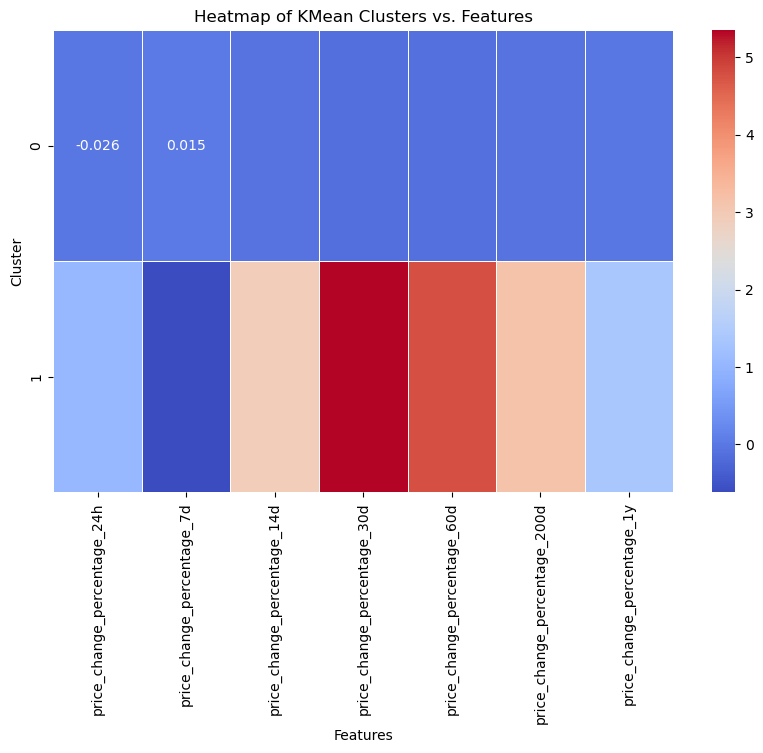

In [65]:
kmean_cluster_group = k_model_prediction.groupby('k_clusters_4').mean()

# Step 3: Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(kmean_cluster_group, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Heatmap of KMean Clusters vs. Features')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

The heatmap visualizes the relationship between KMeans clusters and various features related to cryptocurrency price changes over different time periods (e.g., 24h, 7d, 30d). Here are some key insights:

Cluster 0 appears to have relatively stable values across all time periods, as indicated by the cool colors (blues), with little variation in price changes. This suggests that the assets in Cluster 0 show more stability over time.

Cluster 1, on the other hand, shows significant variation, particularly in the mid-term periods (14d, 30d, 60d, 200d), as indicated by the warmer colors (reds and oranges). This implies that the assets in Cluster 1 are experiencing greater volatility, particularly in these time frames.

The most significant difference between the two clusters is observed in the 30-day price change and 60-day price change, where Cluster 1 exhibits high levels of volatility.

In summary, Cluster 0 represents more stable assets, while Cluster 1 captures assets with higher volatility, particularly over mid-term periods. Further analysis could explore the specific behaviors driving this volatility.

In [50]:
#Inspect the DataFrame with assigned clusters
market_pca_clusters_k2 = market_pca_prediction.reset_index()

#Inspect the DataFrame with assigned clusters
PCA_cryptocurrencies_df = market_pca_clusters_k2.reset_index()

#Retrieve cryptocurrencies coin_id by cluster
for cluster_label in market_pca_clusters_k2['pca_clusters_2'].unique():
    coin_ids_in_cluster = market_pca_clusters_k2[market_pca_clusters_k2['pca_clusters_2'] == cluster_label]['coin_id']
    print(f"Cluster {cluster_label} Cryptocurrencies: {coin_ids_in_cluster.values}")
    print("\n")

market_pca_clusters_k2.head()

Cluster 0 Cryptocurrencies: ['bitcoin' 'ethereum' 'tether' 'ripple' 'bitcoin-cash' 'binancecoin'
 'chainlink' 'cardano' 'litecoin' 'bitcoin-cash-sv' 'crypto-com-chain'
 'usd-coin' 'eos' 'monero' 'tron' 'tezos' 'okb' 'stellar' 'cosmos' 'cdai'
 'neo' 'wrapped-bitcoin' 'leo-token' 'huobi-token' 'nem' 'binance-usd'
 'iota' 'vechain' 'zcash' 'theta-token' 'dash' 'ethereum-classic'
 'ethlend' 'maker' 'havven' 'omisego' 'ontology' 'ftx-token' 'true-usd'
 'digibyte']


Cluster 1 Cryptocurrencies: ['celsius-degree-token']




,coin_id,PCA1,PCA2,PCA3,pca_clusters_4,pca_clusters_2
0,bitcoin,-0.600667,0.842760,0.461595,2,0
1,ethereum,-0.458261,0.458466,0.952877,2,0
2,tether,-0.433070,-0.168126,-0.641752,0,0
3,ripple,-0.471835,-0.222660,-0.479053,0,0
4,bitcoin-cash,-1.157800,2.041209,1.859715,2,0



### Interpretation of the PCA Component Loadings Heatmap

PCA Component Loadings:
      price_change_percentage_24h  price_change_percentage_7d  \
PCA1                    -0.416728                   -0.102432   
PCA2                     0.358162                    0.227432   
PCA3                    -0.218795                    0.787670   

      price_change_percentage_14d  price_change_percentage_30d  \
PCA1                    -0.009162                     0.191523   
PCA2                     0.540415                     0.562182   
PCA3                     0.349534                    -0.181744   

      price_change_percentage_60d  price_change_percentage_200d  \
PCA1                     0.320365                      0.594468   
PCA2                     0.434040                      0.027735   
PCA3                    -0.361377                      0.039733   

      price_change_percentage_1y  
PCA1                    0.568379  
PCA2                   -0.150789  
PCA3                    0.210541  


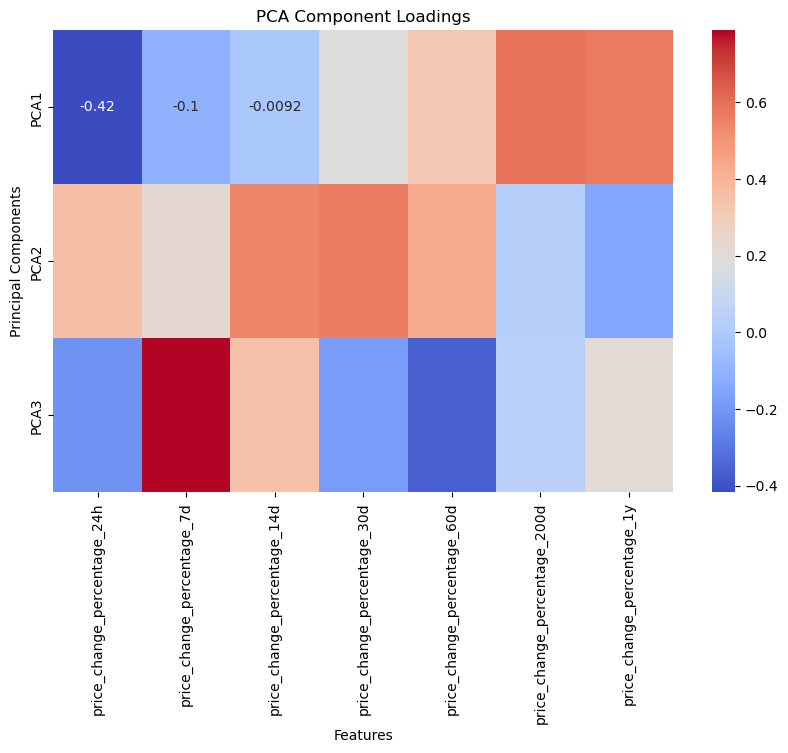

In [51]:
# Step 2: Fit PCA
pca = PCA(n_components=3)  # Choose the number of components you want to retain
pca.fit(market_data_scaled)

# Step 3: Create a DataFrame to show which features contribute to each PCA component
# Access PCA components (weights of each feature for each principal component)
pca_components = pd.DataFrame(
    pca.components_, 
    columns=df_market_data.columns,  # Original feature names as column headers
    index=[f'PCA{i+1}' for i in range(pca.n_components_)]  # Name each component (PCA1, PCA2, ...)
)

# Display the DataFrame
print("PCA Component Loadings:")
print(pca_components)

# If you want to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm')
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


Feature Relationships: The heatmap provides insights into how original features relate to the underlying principal components derived through PCA.

PCA Component Utility: PCA1 and PCA2 capture essential market dynamics. PCA1 is crucial for short-term trends, while PCA2 is more reflective of mid-term performance.

Strategic Decisions: Investors can use this analysis to focus on short-term indicators (like 24h and 7d changes) when making quick trading decisions, while mid-term indicators (30d and 60d changes) might be more relevant for strategic positioning.

#### Final Analysis

The Mid-Term Cluster - yellow cluster - Cluster 2 (k=4) highlights promising investment opportunities in cryptocurrencies that demonstrate consistent growth across both short-term (24 hours) and long-term (7 days) timeframes. This cluster indicates steady upward momentum, making these assets particularly attractive for investors seeking reliable performance.

This includes notable cryptocurrencies such as **Bitcoin, Ethereum, Bitcoin Cash, Binance Coin, Chainlink, Cardano, Litecoin, Monero, Tezos, Cosmos, Wrapped Bitcoin, Zcash, and Maker.**  These assets show potential for sustained growth over a mid-term horizon, further supporting strategic investment decisions.





